In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [44]:
def draw_line(x, y, file_name = None, color = None, label = None, marker=None, markersize=None, linestyle=None, xlabel = None, ylabel = None,
                        xlim = None, xticks = None, ylim = None, yticks = None, log_x = False, log_y = False,
                        draw_legend = None, figsize=None, fig_per_line=None, 
                        linewidth=1, xticks_rotation=0, yticks_rotation=0, 
                        fontsize_dec=0, legend_fontsize_dec=0, legend_ncol=1, legend_loc=None, legend_figsize=None, ybaseline = None, xbaseline = None, baseline_color="#D0D0D0",
                        zorder=None, ):

    scale_factor = 2

    fontsize = (6 - fontsize_dec) * scale_factor
    legend_fontsize = (fontsize/scale_factor - legend_fontsize_dec) * scale_factor
    plt.rcParams.update({'font.size': fontsize})
    
    tickpad = 1.0 * scale_factor
    labelpad = 2.0 * scale_factor
    
    # figurepad_inches = 0.02
    # label_width_inches = 0.15
    # tick_width_inches = 0.15
    figurepad_inches = 0
    label_width_inches = 0
    tick_width_inches = 0
    
    A4w = 8.25 # inch
    A4h = 11.75
    lr_margin = 0.675
    m_margin = 0.15
    single_col_fig_w = (A4w - lr_margin * 2 - m_margin) / 2
    fig_h = (single_col_fig_w / 2 - label_width_inches - tick_width_inches) * 0.75
    cross_col_fig_w = A4w - lr_margin * 2
    if figsize != None:
        assert fig_per_line == None
    else :
        if fig_per_line == None:
            fig_per_line = 2
        if fig_per_line == 1:
            fig_w = cross_col_fig_w
        elif fig_per_line == 2:
            fig_w = single_col_fig_w
        elif fig_per_line == 3:
            fig_w = cross_col_fig_w / 3
        elif fig_per_line == 4:
            fig_w = single_col_fig_w / 2
        else:
            assert False
        # fig_w -= 0.15 * 2 # margin
        fig_w -= tick_width_inches # ticks
        if ylabel:
            fig_w -= label_width_inches # ylabel

        fig_w *= scale_factor
        fig_h *= scale_factor
        figsize = (fig_w, fig_h) 
    print(f"figsize = {figsize}")
    # plt.figure(figsize=figsize)
    fig, ax = plt.subplots(figsize=figsize) # now you can use either plt.xticks or ax.xticks

    # brokenaxes(ylims = ((0, 100), (1000, 1200)))

    if log_x:
        plt.xscale("log", subs=[0]) # should set log before ticks
    if log_y:
        plt.yscale("log", subs=[0])
    
    if xlim:
        plt.xlim(xlim[0], xlim[1])
    if ylim:
        plt.ylim(ylim[0], ylim[1])

    plt.tick_params(axis='both', which='both', direction='in')
    plt.tick_params(axis='y', pad=tickpad)
    if xticks != None:
        plt.xticks(xticks[0], xticks[1], rotation=xticks_rotation)
    if yticks != None:
        plt.yticks(yticks[0], yticks[1], rotation=yticks_rotation)

    plt.xlabel(xlabel, labelpad=labelpad)
    plt.ylabel(ylabel, labelpad=labelpad)
    
    # print(x_len, x)
    for i, (sub_x, sub_y) in enumerate(zip(x, y)):
        # print(yerr[i])
        plt.plot(sub_x, sub_y, linewidth=linewidth, color=color[i] if color is not None else None, label=label[i] if label is not None else None, 
                 marker=marker[i] if marker!=None else None, markersize=markersize[i] if marker!=None else None,
                 linestyle=linestyle[i] if linestyle!=None else None,
                zorder=zorder[i] if zorder!=None else None)

    if draw_legend and draw_legend == "in":
        plt.legend(fontsize=legend_fontsize, framealpha=0.0, loc=legend_loc, ncol=legend_ncol)
    
    fig.tight_layout()
    
    if ybaseline:
        # if xlim:
        #     min_x, max_x = xlim
        # else:
        #     min_x = np.min([np.min(subx) for subx in x])
        #     max_x = np.max([np.max(subx) for subx in x])
        for base_y in ybaseline:
            plt.plot(plt.gca().get_xlim(), [base_y, base_y], linewidth=1, color=baseline_color, linestyle="--", zorder=0.9)
            
    if xbaseline:
        # if ylim:
        #     min_y, max_y = xlim
        # else:
        #     min_y = np.min([np.min(suby) for suby in y])
        #     max_y = np.max([np.max(suby) for suby in y])
        for base_x in xbaseline:
            plt.plot([base_x, base_x], plt.gca().get_ylim(), linewidth=1, color=baseline_color, linestyle="--", zorder=0.9)
    
    
    fig.savefig(file_name, dpi=200)
    # plt.savefig (file_name, dpi=200, bbox_inches = 'tight', pad_inches=figurepad_inches)
    plt.show()
    plt.close()
    
    if not (draw_legend and draw_legend == "out"):
        return

    assert legend_figsize != None
    # plt.figure(figsize=legend_figsize)
    fig, ax = plt.subplots(figsize=legend_figsize)
    
    for i, (sub_x, sub_y) in enumerate(zip(x, y)):
        plt.plot([0], [0], linewidth=linewidth, color=color[i], label=label[i], 
                 marker=marker[i] if marker!=None else None, markersize=markersize[i] if marker!=None else None,
                 zorder=zorder[i] if zorder!=None else None) # zorder

    plt.legend(fontsize=legend_fontsize, loc="center left", framealpha=0.0, ncol=len(models))
    plt.axis('off')
    fig.tight_layout()
    fig.savefig("legend_"+file_name, dpi=200)
    # plt.savefig ("legend_"+file_name, dpi=200, bbox_inches = 'tight', pad_inches=figurepad_inches)
    plt.show()
    plt.close()


In [45]:
# style={"DNF":("#6090F0", "D", "4"), "DNF-DP-Ctrl":("#20C0F0", "v", "5"), "DNF-FastClick":("#E070E0", "x", "7"),
#           "FastClick":("#E06040", "o", "4.5"), "P4NF-CP-Ctrl":("#70B060", "+", "7")}

# value = [[10, 20, 15], [25, 27], ...]
def draw_bar_in_groups(value, label, group_name, file_name, color=None, hatch=None, xlabel = None, ylabel = None,
                       ylim = None, ylim_factor = 1.3, yticks = None, log_y = False, edge_linewidth = None, edge_color = 'black', 
                       inner_space = 0, outer_space = 0.75, edge_space = 0.75, draw_legend = None, figsize=None, fig_per_line=None, 
                       xticks_rotation=0, xticks_offset = 0, xticks_fontsize_dec = 0, yticks_rotation=0, 
                       fontsize_dec=0, legend_fontsize_dec=0, legend_ncol=1, legend_loc=None, legend_figsize=None, 
                       ybaseline = None, yerr = None, error_kw = {}):


    scale_factor = 2 # scale_factor==2 means: Make all linewidth /= 2

    fontsize = (6 - fontsize_dec) * scale_factor
    legend_fontsize = (fontsize/scale_factor - legend_fontsize_dec) * scale_factor
    plt.rcParams.update({'font.size': fontsize})
    
    tickpad = 1.0 * scale_factor
    labelpad = 2.0 * scale_factor
    
    # figurepad_inches = 0.02
    # label_width_inches = 0.15
    # tick_width_inches = 0.15
    figurepad_inches = 0
    label_width_inches = 0
    tick_width_inches = 0
    
    A4w = 8.25 # inch
    A4h = 11.75
    lr_margin = 0.675
    m_margin = 0.15
    single_col_fig_w = (A4w - lr_margin * 2 - m_margin) / 2
    fig_h = (single_col_fig_w / 2 - label_width_inches - tick_width_inches) * 0.75
    cross_col_fig_w = A4w - lr_margin * 2
    if figsize != None:
        assert fig_per_line == None
    else :
        if fig_per_line == None:
            fig_per_line = 2
        if fig_per_line == 1:
            fig_w = cross_col_fig_w
        elif fig_per_line == 2:
            fig_w = single_col_fig_w
        elif fig_per_line == 3:
            fig_w = cross_col_fig_w / 3
        elif fig_per_line == 4:
            fig_w = single_col_fig_w / 2
        else:
            assert False
        # fig_w -= 0.15 * 2 # margin
        fig_w -= tick_width_inches # ticks
        if ylabel:
            fig_w -= label_width_inches # ylabel

        fig_w *= scale_factor
        fig_h *= scale_factor
        figsize = (fig_w, fig_h) 
    print(f"figsize = {figsize}")
    # plt.figure(figsize=figsize)
    fig, ax = plt.subplots(figsize=figsize) # now you can use either plt.xticks or ax.xticks

    # brokenaxes(ylims = ((0, 100), (1000, 1200)))
    
    x_len = edge_space * 2 + outer_space * (len(value[0])-1) + 1.0 * len(value) * len(value[0]) + inner_space * (len(value)-1) * len(value[0])
    
    x = [[edge_space + 0.5 + j * (len(value) + (len(value)-1)*inner_space + outer_space) + i * (1+inner_space) 
          for j in range(len(value[0]))] for i in range(len(value))]

    if log_y:
        plt.yscale("log", subs=[0])
    
    plt.xlim(0, x_len)
    if ylim:
        plt.ylim(ylim[0], ylim[1])
    else:
        plt.ylim(0, np.array(value).max() * ylim_factor)
    
    plt.tick_params(axis='both', which='both', direction='in', bottom=False, top=False, left=True, right=False)#隐藏x刻度
    plt.tick_params(axis='y', pad=tickpad)
    plt.xticks([(xl+xr)/2 + xticks_offset for xl, xr in zip(x[0],x[-1])], group_name, rotation = xticks_rotation, fontsize = (fontsize/scale_factor - xticks_fontsize_dec) * scale_factor)
    if yticks != None:
        plt.yticks(yticks[0], yticks[1], rotation=yticks_rotation)

    plt.xlabel(xlabel, labelpad=labelpad)
    plt.ylabel(ylabel, labelpad=labelpad)
    
    if color is None:
        color = plt.get_cmap('viridis')(np.linspace(0.2, 0.8, len(value)))
    # print(x_len, x)
    for i, (sub_x, sub_y) in enumerate(zip(x, value)):
        # print(yerr[i])
        plt.bar(sub_x, sub_y, width = 1.0, color = color[i], label=label[i], 
                edgecolor=edge_color, linewidth=edge_linewidth, hatch=hatch[i] if hatch!=None else None,
               yerr = yerr[i] if yerr!=None else None, error_kw = error_kw)
    
    if ybaseline:
        for base_y in ybaseline:
            plt.plot([0, x_len], [base_y, base_y], linewidth=1, color="#D0D0D0", linestyle="--", zorder=0.9)
    # print(x)

    if draw_legend and draw_legend == "in":
        plt.legend(fontsize=legend_fontsize, framealpha=0.0, loc=legend_loc, ncol=legend_ncol)
            
    fig.tight_layout()
    fig.savefig(file_name, dpi=200)
    # plt.savefig (file_name, dpi=200, bbox_inches = 'tight', pad_inches=figurepad_inches)
    plt.show()
    plt.close()
    
    if not (draw_legend and draw_legend == "out"):
        return

    assert legend_figsize != None
    # plt.figure(figsize=legend_figsize)
    fig, ax = plt.subplots(figsize=legend_figsize)
    
    for i, (sub_x, sub_y) in enumerate(zip(x, value)):
        plt.bar([0], [0], color = color[i], label=label[i], edgecolor=edge_color, linewidth=edge_linewidth, hatch=hatch[i]) # zorder

    plt.legend(fontsize=legend_fontsize, loc="center left", framealpha=0.0, ncol=len(models))
    plt.axis('off')
    fig.tight_layout()
    fig.savefig("legend_"+file_name, dpi=200)
    # plt.savefig ("legend_"+file_name, dpi=200, bbox_inches = 'tight', pad_inches=figurepad_inches)
    plt.show()
    plt.close()
    
def draw_bar2_in_groups(value, color, label, group_name, file_name, hatch=None, xlabel = None, ylabel = None,
                       ylim = None, yticks = None, log_y = False, edge_linewidth = None, edge_color = 'black', 
                       inner_space = 0, outer_space = 0.75, edge_space = 0.75, draw_legend = None, figsize=None, fig_per_line=None, 
                       xticks_rotation=0, xticks_offset = 0, xticks_fontsize_dec = 0, yticks_rotation=0, 
                       fontsize_dec=0, legend_fontsize_dec=0, legend_ncol=1, legend_loc=None, legend_figsize=None, ybaseline = None, 
                    yerr = None, error_kw = {}):


    scale_factor = 2 # scale_factor==2 means: Make all linewidth /= 2

    fontsize = (6 - fontsize_dec) * scale_factor
    legend_fontsize = (fontsize/scale_factor - legend_fontsize_dec) * scale_factor
    plt.rcParams.update({'font.size': fontsize})
    
    tickpad = 1.0 * scale_factor
    labelpad = 2.0 * scale_factor
    
    # figurepad_inches = 0.02
    # label_width_inches = 0.15
    # tick_width_inches = 0.15
    figurepad_inches = 0
    label_width_inches = 0
    tick_width_inches = 0
    
    A4w = 8.25 # inch
    A4h = 11.75
    lr_margin = 0.675
    m_margin = 0.15
    single_col_fig_w = (A4w - lr_margin * 2 - m_margin) / 2
    fig_h = (single_col_fig_w / 2 - label_width_inches - tick_width_inches) * 0.75
    cross_col_fig_w = A4w - lr_margin * 2
    if figsize != None:
        assert fig_per_line == None
    else :
        if fig_per_line == None:
            fig_per_line = 2
        if fig_per_line == 1:
            fig_w = cross_col_fig_w
        elif fig_per_line == 2:
            fig_w = single_col_fig_w
        elif fig_per_line == 3:
            fig_w = cross_col_fig_w / 3
        elif fig_per_line == 4:
            fig_w = single_col_fig_w / 2
        else:
            assert False
        # fig_w -= 0.15 * 2 # margin
        fig_w -= tick_width_inches # ticks
        if ylabel:
            fig_w -= label_width_inches # ylabel

        fig_w *= scale_factor
        fig_h *= scale_factor
        figsize = (fig_w, fig_h) 
    print(f"figsize = {figsize}")
    # plt.figure(figsize=figsize)
    fig, ax = plt.subplots(figsize=figsize) # now you can use either plt.xticks or ax.xticks

    # brokenaxes(ylims = ((0, 100), (1000, 1200)))
    
    x_len = edge_space * 2 + outer_space * (len(value[0])-1) + 1.0 * len(value) * len(value[0]) + inner_space * (len(value)-1) * len(value[0])
    
    x = [[edge_space + 0.5 + j * (len(value) + (len(value)-1)*inner_space + outer_space) + i * (1+inner_space) 
          for j in range(len(value[0]))] for i in range(len(value))]

    if log_y:
        plt.yscale("log", subs=[0])
    
    plt.xlim(0, x_len)
    if ylim:
        plt.ylim(ylim[0], ylim[1])
    
    plt.tick_params(axis='both', which='both', direction='in', bottom=False, top=False, left=True, right=False)#隐藏x刻度
    plt.tick_params(axis='y', pad=tickpad)
    plt.xticks([(xl+xr)/2 + xticks_offset for xl, xr in zip(x[0],x[-1])], group_name, rotation = xticks_rotation, fontsize = (fontsize/scale_factor - xticks_fontsize_dec) * scale_factor)
    if yticks != None:
        plt.yticks(yticks[0], yticks[1], rotation=yticks_rotation)

    plt.xlabel(xlabel, labelpad=labelpad)
    plt.ylabel(ylabel, labelpad=labelpad)
    
    # print(x_len, x)
    for i, (sub_x, sub_y) in enumerate(zip(x, value)):
        # print(yerr[i])
        y_low = [y[0] for y in sub_y]
        y_high = [y[1] for y in sub_y]
        plt.bar(sub_x, y_low, width = 1.0, color = color[i], label=label[i], 
                edgecolor=edge_color, linewidth=edge_linewidth, hatch=hatch[i] if hatch!=None else None,
               yerr = yerr[i] if yerr!=None else None, error_kw = error_kw, zorder=3.1)
        plt.bar(sub_x, y_high, width = 1.0, color = 'white', 
                edgecolor=edge_color, linewidth=edge_linewidth,
               yerr = yerr[i] if yerr!=None else None, error_kw = error_kw, linestyle=':')
    
    if ybaseline:
        for base_y in ybaseline:
            plt.plot([0, x_len], [base_y, base_y], linewidth=1, color="#D0D0D0", linestyle="-", zorder=0.9)
    
    # print(x)

    if draw_legend and draw_legend == "in":
        plt.legend(fontsize=legend_fontsize, framealpha=0.0, loc=legend_loc, ncol=legend_ncol)
            
    fig.tight_layout()
    fig.savefig(file_name, dpi=200)
    # plt.savefig (file_name, dpi=200, bbox_inches = 'tight', pad_inches=figurepad_inches)
    plt.show()
    plt.close()
    
    if not (draw_legend and draw_legend == "out"):
        return

    assert legend_figsize != None
    # plt.figure(figsize=legend_figsize)
    fig, ax = plt.subplots(figsize=legend_figsize)
    
    for i, (sub_x, sub_y) in enumerate(zip(x, value)):
        plt.bar([0], [0], color = color[i], label=label[i], edgecolor=edge_color, linewidth=edge_linewidth, hatch=hatch[i]) # zorder

    plt.legend(fontsize=legend_fontsize, loc="center left", framealpha=0.0, ncol=len(models))
    plt.axis('off')
    fig.tight_layout()
    fig.savefig("legend_"+file_name, dpi=200)
    # plt.savefig ("legend_"+file_name, dpi=200, bbox_inches = 'tight', pad_inches=figurepad_inches)
    plt.show()
    plt.close()

    







In [46]:
import json
with open('figure.json', 'r', encoding='utf-8') as file:
    data = json.load(file)
conversation_round_cnt = data["conversation_round_cnt"]
conversation_len = data["conversation_len"]
round_prompt_len = data["round_prompt_len"]
round_new_prompt_len = data["round_new_prompt_len"]
round_response_len = data["round_response_len"]
seq_len_in_decode = data["seq_len_in_decode"]
prompt_lens = [seq_len_range[0] for seq_len_range in seq_len_in_decode]
response_lens = [seq_len_range[1]-seq_len_range[0] for seq_len_range in seq_len_in_decode]
new_prompt_lens = [seq_len_range[2] for seq_len_range in seq_len_in_decode]

for i, seq_len_range in enumerate(seq_len_in_decode):
    if seq_len_range[1] < seq_len_range[0]:
        raise Exception(f"seq_len_in_decode[{i}]={seq_len_in_decode[i]} is invalid")
        
conversation_round_cnt.sort()
conversation_len.sort()
round_prompt_len.sort()
round_new_prompt_len.sort()
round_response_len.sort()

total_num_requests = len(seq_len_in_decode)
total_num_tokens = sum([seq_len_range[1] for seq_len_range in seq_len_in_decode])

max_seq_len = max([seq_len_range[1] for seq_len_range in seq_len_in_decode])
print(f"max_seq_len {max_seq_len}")
seq_cnt_at_len = np.zeros(max_seq_len + 2, dtype=np.int32)
seq_len_start = np.array(list(seq_len_range[0] for seq_len_range in seq_len_in_decode))
seq_len_end = np.array(list(seq_len_range[1] + 1 for seq_len_range in seq_len_in_decode))

# for i, seq_len_range in enumerate(seq_len_in_decode):
#     if seq_len_end[i] < seq_len_start[i]:
#         raise Exception(f"seq_len_in_decode[{i}]={seq_len_in_decode[i]} is invalid")
# print(seq_len_start)
counts_start = np.bincount(seq_len_start, minlength=len(seq_cnt_at_len))
seq_cnt_at_len += counts_start
print(np.sum(seq_cnt_at_len), len(seq_len_start))
counts_end = np.bincount(seq_len_end, minlength=len(seq_cnt_at_len))
seq_cnt_at_len -= counts_end
print(np.sum(seq_cnt_at_len), len(seq_len_end))
# print(seq_cnt_at_len[:100])
np.cumsum(seq_cnt_at_len, out=seq_cnt_at_len)

if np.any(seq_cnt_at_len < 0):
    print(seq_cnt_at_len[seq_cnt_at_len < 0])
    raise Exception()
# print(seq_cnt_at_len[:100])
seq_tokens_at_len = seq_cnt_at_len * np.arange(1, len(seq_cnt_at_len) + 1)
# print(seq_tokens_at_len[:100])
seq_tokens_at_len_prefix_sum = seq_tokens_at_len.cumsum()
seq_cnt_at_len_prefix_sum = seq_cnt_at_len.cumsum()
# print(seq_tokens_at_len_prefix_sum[:100])
seq_tokens_at_len_sum_origin = seq_tokens_at_len_prefix_sum[-1]
seq_tokens_at_len_prefix_sum = seq_tokens_at_len_prefix_sum.astype(np.float64) / seq_tokens_at_len_sum_origin

seq_cnt_at_len_sum_origin = seq_cnt_at_len_prefix_sum[-1]
seq_cnt_at_len_prefix_sum = seq_cnt_at_len_prefix_sum.astype(np.float64) / seq_cnt_at_len_sum_origin

print(len(conversation_round_cnt), len(conversation_len), len(round_prompt_len), len(round_new_prompt_len), len(round_response_len))

max_seq_len 457764
733551 733551
0 733551
90665 90665 719155 719155 733551


figsize = (6.75, 2.53125)


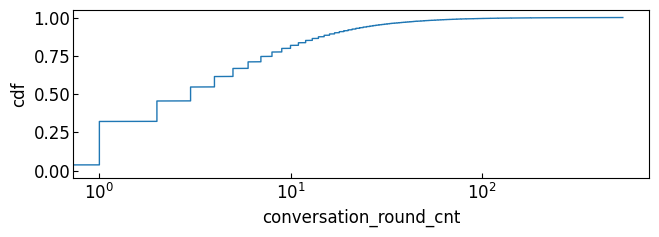

In [47]:
draw_line([conversation_round_cnt], [[y/len(conversation_round_cnt) for y in range(len(conversation_round_cnt))]], color = [None], label = [None], file_name = 'conversation_round_cnt.pdf',
          xlabel = 'conversation_round_cnt', log_x=1, ylabel = 'cdf', fig_per_line=2)

figsize = (6.75, 2.53125)


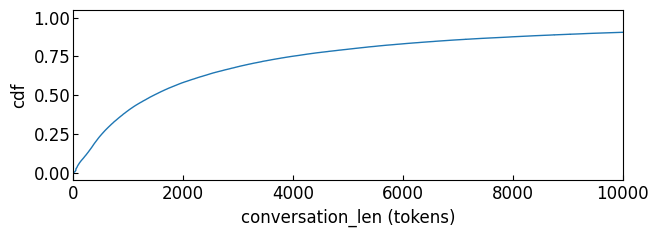

In [48]:
draw_line([conversation_len], [[y/len(conversation_len) for y in range(len(conversation_len))]], color = [None], label = [None], file_name = 'conversation_len.png',
          xlabel = 'conversation_len (tokens)', xlim = [0, 10000], ylabel = 'cdf', fig_per_line=2)

[719155, 719155, 733551]
[84.12515938844895, 11736.299247032975, 456.8643339045274]
3424 1102.56538655142 22370.003534699008
figsize = (6.75, 2.53125)


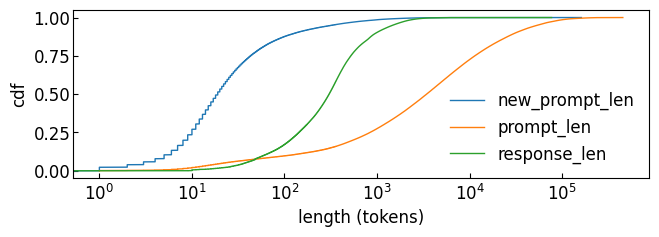

In [49]:
x_groups = [round_new_prompt_len, round_prompt_len, round_response_len]
print([len(xs) for xs in x_groups])
print([np.mean(xs) for xs in x_groups])
half = len(round_prompt_len) // 2
print(round_prompt_len[half], np.mean(round_prompt_len[:half]), np.mean(round_prompt_len[half:]))
y_groups = [[y/len(xs) for y in range(len(xs))] for xs in x_groups]
draw_line(x_groups, y_groups, color = [None, None, None], label = ["new_prompt_len", "prompt_len", "response_len"], file_name = 'round_statistics.png',
          xlabel = 'length (tokens)', log_x=1, ylabel = 'cdf', draw_legend="in", fig_per_line=2)

457766
0.987150130688698 0.8225548551278415
5357 2028.2974394852408 33872.84358000045
5357 21851 199424
0.8000009021432423 0.24462317218182345
figsize = (3.375, 2.53125)


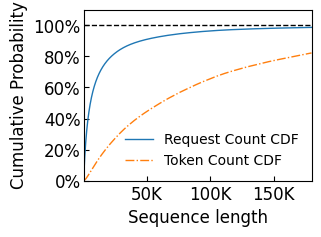

In [50]:
import bisect
print(len(seq_tokens_at_len_prefix_sum))
xlim = 180000
print(seq_cnt_at_len_prefix_sum[xlim], seq_tokens_at_len_prefix_sum[xlim])

median_len = bisect.bisect_left(seq_cnt_at_len_prefix_sum, 0.5)

avg_len_below_50 = (0.5 * median_len - sum(seq_cnt_at_len_prefix_sum[:median_len])) / 0.5
avg_len_above_50 = (1.0 * len(seq_cnt_at_len_prefix_sum) - sum(seq_cnt_at_len_prefix_sum[median_len:]) - 0.5 * median_len) / 0.5

print(median_len, avg_len_below_50, avg_len_above_50)
print(bisect.bisect_left(seq_cnt_at_len_prefix_sum, 0.5), bisect.bisect_left(seq_cnt_at_len_prefix_sum, 0.8), bisect.bisect_left(seq_cnt_at_len_prefix_sum, 0.99))

ybaseline=bisect.bisect_left(seq_cnt_at_len_prefix_sum, 0.8)
print(seq_cnt_at_len_prefix_sum[ybaseline], seq_tokens_at_len_prefix_sum[ybaseline])
y_groups = [seq_cnt_at_len_prefix_sum, seq_tokens_at_len_prefix_sum]
x_groups = [range(len(ys)) for ys in y_groups]

xticks = [[50000, 100000, 150000], ['50K', '100K', '150K']]
yticks = [np.linspace(0, 1, 6), [f"{int(100*y)}%" for y in np.linspace(0, 1, 6)]]

label = ["Request Count CDF", "Token Count CDF"]

draw_line(x_groups, y_groups, label = label, file_name = 'request_distribution.pdf',
          xlabel = 'Sequence length', ylabel = 'Cumulative Probability', 
          xlim=[None, xlim], ylim=[0, 1.1], xticks=xticks, yticks=yticks, ybaseline=[1.0], baseline_color="black", #xbaseline=[ybaseline], 
          linestyle=['-', '-.'], 
          draw_legend="in", fig_per_line=4, legend_fontsize_dec=1)

In [62]:
import numpy as np
from scipy.interpolate import interp1d
from collections import deque
import math
import time

max_model_len = 131072
num_engines = 16
len_exp = 1.1

lens = [0, 100]
while True:
    next_l = int(lens[-1] * len_exp)
    if next_l >= len(seq_tokens_at_len_prefix_sum) or next_l >= max_model_len:
        lens.append(min(len(seq_tokens_at_len_prefix_sum), max_model_len)-1)
        break
    lens.append(next_l)

assert len(lens) >= num_engines * 4
print(f"num of split lens = {len(lens)}")

# cost_cdf_inv = interp1d(seq_tokens_at_len_prefix_sum, list(range(len(seq_tokens_at_len_prefix_sum))), kind='linear',  fill_value="extrapolate")
# req_cdf = seq_tokens_at_len_prefix_sum
g = np.full((num_engines+1, len(lens)), np.inf)
g[0,0] = 0
last_l_idx = np.full((num_engines+1, len(lens)), 0)

# We always use Llama-3.1-8B as the model because we assume transformers are similar
# Llama-3.1-8B
model_size = 16 * 1000 * 1000 * 1000 # Bytes
token_size = 131072 
gpu_mem_size = 80 * 1024 * 1024 * 1024
mem_reserve = 0.1
total_kv_cache_size = int(gpu_mem_size * (1-mem_reserve) - model_size)
total_kv_cache_util = 0.5
# gpu_mem_size_used = int(model_size + total_kv_cache_util * total_kv_cache_size)

# all_gpus_mem_size_used = gpu_mem_size_used * num_engines # Assume each engine has one gpu
num_tokens_in_all_gpus = total_kv_cache_util * total_kv_cache_size * num_engines / token_size

model_size_in_tokens = model_size / token_size
print(f"model_size_in_tokens={model_size_in_tokens}")

model_factor = 1 # 3 for H100, 0.5 for H20
request_token_factor = num_tokens_in_all_gpus
request_num_factor = seq_cnt_at_len_sum_origin * (num_tokens_in_all_gpus / seq_tokens_at_len_sum_origin) # scale (reduce) the number of request and the tokens of request

print(f"avg_num_requests_per_engine={request_num_factor/num_engines}, avg_num_tokens_per_engine={request_token_factor/num_engines} ({request_token_factor/num_engines*token_size/1e9}GB)")


def cost(l, r, n_e):
    # return n_e * (seq_cnt_at_len_prefix_sum[r]-seq_cnt_at_len_prefix_sum[l])/n_e * ((seq_tokens_at_len_prefix_sum[r]-seq_tokens_at_len_prefix_sum[l])/n_e) ** 2
    num_request_per_engine = (seq_cnt_at_len_prefix_sum[r]-seq_cnt_at_len_prefix_sum[l]) * request_num_factor /n_e
    avg_request_jct = model_size_in_tokens * model_factor + (seq_tokens_at_len_prefix_sum[r]-seq_tokens_at_len_prefix_sum[l]) * request_token_factor /n_e
    return n_e * num_request_per_engine * avg_request_jct

t0 = time.perf_counter()
t0 = time.perf_counter()
dp_cnt = 0
# O(e*log^2(l))
for s in range(1, num_engines+1):
    for l_idx in range(len(lens)):
        for prev_l_idx in range(l_idx+1):
            dp_cnt += 1
            l = lens[l_idx]
            prev_l = lens[prev_l_idx]
            num_sub_engines = 1
            # print(seq_cnt_at_len_prefix_sum[l], seq_tokens_at_len_prefix_sum[l])
            new_g = g[s-1,prev_l_idx] + cost(prev_l, l, num_sub_engines)
            if g[s,l_idx] > new_g:
                g[s,l_idx] = new_g
                last_l_idx[s,l_idx] = prev_l_idx
        # print(f"[{s}, {lens[l_idx]}]=({g[s,l_idx]}, {lens[last_l_idx[s,l_idx]]})")

t1 = time.perf_counter()


result_l_idx = list()
remain_l_idx = len(lens)-1
for s in range(num_engines, 0, -1):
    # result_l_idx.appendleft(remain_l_idx)
    result_l_idx = [remain_l_idx] + result_l_idx
    remain_l_idx = last_l_idx[s,remain_l_idx]

# result_l_idx.appendleft(0)
result_l_idx = [0] + result_l_idx
result = [lens[idx] for idx in result_l_idx]
print(f"result[len(result)//2]={result[len(result)//2]}")
print(result)
print([cost(lens[result_l_idx[i]], lens[result_l_idx[i+1]], 1) for i in range(len(result_l_idx)-1)])
# transfer_factor = 0.1
# transfer_cost_per_stage = transfer_factor * g[num_engines,len(lens)-1] / (num_engines - 1)
# print(f"transfer_cost_per_stage={transfer_cost_per_stage}")

result_num_engines = [1 for _ in range(len(result_l_idx)-1)] + [0]




# Reduce Forward Cost (deprecated)
max_forward_engines = 8

# This can be O(e)
while True:
    remain_num_engines = num_engines
    merged = False
    for i in range(len(result_num_engines)-1):
        remain_num_engines -= result_num_engines[i]
        if remain_num_engines / result_num_engines[i] > max_forward_engines:
            result_num_engines[i] += result_num_engines[i+1]
            result_l_idx = result_l_idx[:i+1] + result_l_idx[i+2:]
            result_num_engines = result_num_engines[:i+1] + result_num_engines[i+2:]
            print(f"merging stage {i} and {i+1}")
            merged = True
            break
    if not merged:
        break

merged_result = [(lens[idx], e) for idx, e in zip(result_l_idx, result_num_engines)]
print(f"result after merge for forward: {merged_result}")
print([cost(lens[result_l_idx[i]], lens[result_l_idx[i+1]], result_num_engines[i]) for i in range(len(result_l_idx)-1)])




# Reduce Transfer Cost
all_transfer_cost = 0.15 * g[num_engines,len(lens)-1] # the cost if we transfer all request **ONCE**
print(f"all_transfer_cost={all_transfer_cost}")

t2 = time.perf_counter()

# O(e^2), can be O(eloge)
while True:
    max_cost_reduce = 0
    merge_point = None
    for i in range(1, len(result_l_idx)-1):
        left_len = lens[result_l_idx[i-1]]
        middle_len = lens[result_l_idx[i]]
        right_len = lens[result_l_idx[i+1]]
        # The number of transferred requests compared with all requests
        transfer_ratio = (seq_cnt_at_len_prefix_sum[middle_len]-seq_cnt_at_len_prefix_sum[middle_len-1]) * seq_cnt_at_len_sum_origin / total_num_requests 
        # transfer_ratio = (seq_tokens_at_len_prefix_sum[middle_len]-seq_tokens_at_len_prefix_sum[middle_len-1]) * seq_tokens_at_len_sum_origin / total_num_tokens 
        # NOTE: seq_cnt_at_len_prefix_sum is in [0,1], *=seq_cnt_at_len_sum_origin make it to the number of requests
        # print(f"num_transfer={(seq_cnt_at_len_prefix_sum[middle_len]-seq_cnt_at_len_prefix_sum[middle_len-1]) * seq_cnt_at_len_sum_origin}, total_num_requests={total_num_requests}")
        print(f"transfer_ratio={transfer_ratio}, cost={all_transfer_cost * transfer_ratio}")
        cost_reduce = all_transfer_cost * transfer_ratio \
            + cost(left_len, middle_len, result_num_engines[i-1]) + cost(middle_len, right_len, result_num_engines[i]) \
            - cost(left_len, right_len, result_num_engines[i-1]+result_num_engines[i])
        print(f"cost_reduce[{i}]={cost_reduce}")
        if cost_reduce > max_cost_reduce:
            max_cost_reduce = cost_reduce
            merge_point = i
    if merge_point is None:
        break
    result_l_idx = result_l_idx[:merge_point] + result_l_idx[merge_point+1:]
    result_num_engines[merge_point-1] += result_num_engines[merge_point]
    result_num_engines = result_num_engines[:merge_point] + result_num_engines[merge_point+1:]

t3 = time.perf_counter()


merged_result = [(lens[idx], e) for idx, e in zip(result_l_idx, result_num_engines)]
print(f"result after merge for transfer: {merged_result}")
print([cost(lens[result_l_idx[i]], lens[result_l_idx[i+1]], result_num_engines[i]) for i in range(len(result_l_idx)-1)])


dp_time = t1-t0
speedup = (num_engines * max_model_len * (max_model_len+1) // 2)/dp_cnt
print(f"DP time = {dp_time}, merge time = {t3-t2}, estimated full DP time = {dp_time * speedup}, speedup = {speedup}, DP cnt = {dp_cnt}.")

num of split lens = 78
model_size_in_tokens=122070.3125
avg_num_requests_per_engine=13.02821074196076, avg_num_tokens_per_engine=233876.84375 (30.654705664GB)
result[len(result)//2]=16639
[0, 1273, 2478, 3987, 5835, 7764, 10333, 13752, 16639, 20132, 24359, 29473, 39228, 52211, 69492, 92493, 131071]
[6088765.5631993, 4389934.579816242, 4303686.408171263, 4043998.4872617573, 3057893.679725653, 3312625.697410301, 3443177.7488808157, 1876708.7957104817, 1843261.433926227, 1800039.4555398151, 1747428.459332097, 3004136.2885805136, 2532356.348037148, 2252412.114541827, 1939634.1069290454, 1869069.396839891]
merging stage 0 and 1
merging stage 1 and 2
merging stage 2 and 3
merging stage 3 and 4
result after merge for forward: [(0, 2), (2478, 2), (5835, 2), (10333, 2), (16639, 1), (20132, 1), (24359, 1), (29473, 1), (39228, 1), (52211, 1), (69492, 1), (92493, 1), (131071, 0)]
[10654691.647684243, 8382852.979662217, 6377276.396992288, 5241699.086309258, 1843261.433926227, 1800039.4555398151, 17

In [52]:
import numpy as np
from scipy.optimize import root

def optimize_by_kkt(C, k, A, B, a, b, x0=None):
    """
    解k-1个KKT方程，返回最优切点 S = [0, S1, ..., S_{k-1}, C]
    参数:
      C    : 区间上界
      k    : 划分段数
      A,B  : CDF 函数 (可广播到 array)
      a,b  : PDF 函数，即A', B'
      x0   : 可选的初始猜测数组，长度 k-1
    返回:
      S_opt: length k+1 的数组 [0, S1, …, S_{k-1}, C]
      sol  : scipy OptimizeResult 对象
    """
    # 如果没给初始值，就用等距离
    if x0 is None:
        x0 = np.linspace(0, C, k+1)[1:-1]
    
    def equations(s):
        # 在头尾加上固定点
        S = np.concatenate(([0.0], s, [C]))
        F = np.zeros_like(s)
        # 对每个内部切点写出一条方程 ∂J/∂S_j = 0
        for j in range(1, k):
            Bjp = B(S[j+1]) - B(S[j])
            Bjm = B(S[j])   - B(S[j-1])
            Ajp = A(S[j+1]) - A(S[j])
            Ajm = A(S[j])   - A(S[j-1])
            F[j-1] = a(S[j])*(Bjm - Bjp) + b(S[j])*(Ajm - Ajp)
        return F

    sol = root(equations, x0, method='hybr')
    S_opt = np.concatenate(([0.0], sol.x, [C]))
    return S_opt, sol

# —— 示例 —— #
def main():
    # 假设 C=1, k=4 段
    C = 1.0
    k = 3
    
    # 例子：A(x)=x, a(x)=1；B(x)=x^2, b(x)=2x
    A = lambda x: x
    a = lambda x: np.ones_like(x)
    B = lambda x: x**2
    b = lambda x: 2*x

    S_opt, res = optimize_by_kkt(C, k, A, B, a, b)
    print("优化成功:", res.success)
    print("切点 S =", S_opt)

main()

优化成功: True
切点 S = [0.         0.45784853 0.75350482 1.        ]


0 456 143.0 521.0 733551
100 439 124.0 496.0 608557
119 439 122.0 497.0 582530
141 440 120.0 499.0 553357
168 440 115.0 503.0 520211
200 440 107.0 510.0 483996
238 443 97.0 526.0 441474
283 453 88.0 543.0 390390
336 477 84.0 572.0 330676
400 523 92.0 646.0 265532
476 580 108.0 743.0 208468
566 639 137.0 833.0 163379
673 686 155.0 898.0 129630
800 719 146.0 935.0 103292
951 792 194.0 989.0 76855
1131 829 211.0 988.0 58808
1345 862 215.0 985.0 43937
1600 910 206.0 970.0 31182
1903 1014 193.0 993.0 20392
2263 1249 205.0 1031.75 12014
2691 1687 229.0 1101.0 6601
3200 2555 241.0 1460.0 3393
3805 4445 293.0 4143.75 1626
4525 7023 555.0 10368.0 907
5382 10485 2210.0 14788.0 549
6400 11198 2948.0 15911.0 469
7611 11505 3772.0 16183.0 411
9051 11307 3656.0 16862.0 368
10763 11206 3618.25 15477.75 320
12800 11189 3092.0 15972.0 266
15222 10673 3410.0 15261.5 223
18102 10732 3440.0 13747.5 171
21527 10155 2755.0 14090.5 131
25600 9694 2787.0 10981.0 93
30444 9791 1425.0 15653.0 57
36204 13104 469

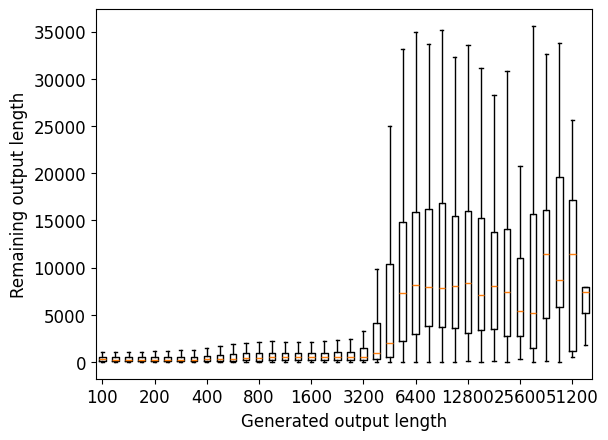

In [53]:
import math
start = 100
exp = 2 ** 0.25
xticks = []
remain_len = []
num_request_after_generate = []
export_data = []
for basel in [0] + [int(start * exp ** k + 0.5) for k in range(int(math.log(max(response_lens)/start)/math.log(exp)))]:
    data = [l-basel for l in response_lens if l >= basel]
    print(basel, int(np.mean(data)), np.quantile(data, 0.25), np.quantile(data, 0.75), len(data))
    export_data.append((basel, int(np.mean(data))))
    remain_len.append(data)
    num_request_after_generate.append(len(data))
    xticks.append(basel)

print(export_data)
# plt.yscale("log", subs=[0])
plt.boxplot(remain_len[1:], showfliers=False)
# plt.violinplot(remain_len[1:], showextrema=False)
plt.xticks(ticks=list(range(1, len(xticks)))[::4], labels=xticks[1:][::4])
plt.xlabel("Generated output length")
plt.ylabel("Remaining output length")
plt.savefig ("remaining_output_length.png", dpi=400, bbox_inches = 'tight')
plt.show()

In [54]:
import random

def make_linear_clamp(xp, fp):
    xp = np.asfarray(xp)
    fp = np.asfarray(fp)
    def f(xi):
        # xi 可以是标量，也可以是数组
        return np.interp(xi, xp, fp, left=fp[0], right=fp[-1])
    return f

x = np.array(export_data)[:,0]
y = np.array(export_data)[:,1]
len_to_remain = make_linear_clamp(x, y)



# total_num_requests
model_cost_in_token = 131072 # 8b model and 128KB sized kv
total_mem_in_token = 131072 * 5 # 80GB
engine_mem_tpt_in_token = 131072 * 5 * 10 # 0.1s per iter for full memory
num_engines = 4
rate_per_engine = 1
request_per_engine = 100
total_rate = rate_per_engine * num_engines
total_request = request_per_engine * num_engines

predict_len = 100

def get_load_by_num(b):
    return len(b)

def get_load_by_mem(b):
    return np.sum(np.array(b+[[0,0,0]])[:,0])

def get_load_by_predict(b):
    load = 0
    for existing, remaining, origin in b:
        predict_remain = remaining # len_to_remain(existing - origin)
        limited_predict_remain = min(predict_remain, predict_len)
        # if predict_remain < predict_len:
        #     print(existing - origin, predict_remain, predict_len)
        load += (existing + 0.5 * limited_predict_remain) * limited_predict_remain / predict_len
    return load

def update_batch(b, dt):
    eps = 1e-6
    # initial_num_req = len(b)
    total_iter_forward = 0
    while dt > eps and len(b) > 0:
        selected_b = []
        mem = 0
        for existing, remaining, origin in b:
            mem += existing
            if mem <= total_mem_in_token - model_cost_in_token:
                selected_b.append([existing, remaining, origin])
            else:
                break
        # len_selected_b = len(selected_b)
        min_remain = np.min(np.array(selected_b)[:,1])
        batch_total_mem = model_cost_in_token + np.sum(np.array(selected_b)[:,0])
        iter_forward = min(engine_mem_tpt_in_token * dt / batch_total_mem, min_remain) 
        total_iter_forward += iter_forward
        for id in range(len(selected_b)):
            selected_b[id][0] += iter_forward
            selected_b[id][1] -= iter_forward
        
        dt -= iter_forward * batch_total_mem / engine_mem_tpt_in_token
        b[:len(selected_b)] = selected_b
        b[:] = [[e,r,o] for e,r,o in b if r > eps] # inplace update
    # print(total_iter_forward)
    # num_finished = initial_num_req-len(b)
    # if num_finished:
    #     print(f"{num_finished} requests finished")
dataset = []

for _ in range(total_request):
    ridx = random.randint(0, total_num_requests-1)
    dt = random.expovariate(total_rate) # a special case of Gamma
    dataset.append([prompt_lens[ridx], response_lens[ridx], dt])


for load_func in [get_load_by_num, get_load_by_mem, get_load_by_predict]:
    batchs = [[] for _ in range(num_engines)]
    mem_variances = []
    mem_maxs = []
    mem_mins = []
    mem_sums = []
    t = 0
    for rid in range(len(dataset)):
        dt = dataset[rid][2]
        load = []
        for b in batchs:
            update_batch(b, dt)
            load.append(load_func(b))
        idx = load.index(min(load))
        batchs[idx].append([dataset[rid][0], dataset[rid][1], dataset[rid][0]]) # copy
        
        mem = [get_load_by_mem(b) for b in batchs]
        mem_sum = np.sum(mem)
        mem_sums.append(mem_sum)
        mem_maxs.append(np.max(mem))
        mem_mins.append(np.min(mem))
        mem_variance = np.std(mem)
        mem_variances.append(mem_variance)

    print(np.mean(mem_variances), np.mean(mem_maxs), np.mean(mem_mins), np.mean(mem_sums))
    print([mem_sum/num_engines/total_mem_in_token for mem_sum in mem_sums])

92859.82074448215 376318.53094035713 136830.1953305569 978628.0290863523
[2.40325927734375e-05, 0.000290398977385907, 0.0012336600713973866, 0.009169858055419384, 0.009275860888511166, 0.011422248281250089, 0.013128787598588742, 0.013167576996627425, 0.029872440477493413, 0.03214811872079314, 0.032625146080766956, 0.034826514962652134, 0.035398364604994736, 0.0359183645194923, 0.038206398958745565, 0.042242606422261894, 0.05553342319066564, 0.06149114636647764, 0.06277981041611916, 0.027260716383659768, 0.019497321473171184, 0.0221967700105349, 0.022606890410834773, 0.02314370213475169, 0.02339784188467749, 0.03453463324557996, 0.040055614030668346, 0.04294706340000096, 0.04077352669534505, 0.04494288184368452, 0.04530063274267504, 0.04777453457027867, 0.05990426611704878, 0.06393885857574581, 0.06821370414005877, 0.06852403417172644, 0.06720898065524994, 0.06823010185850442, 0.06913241397204795, 0.07232025660974281, 0.07249038645501996, 0.0736994681581605, 0.07134992714598647, 0.07552

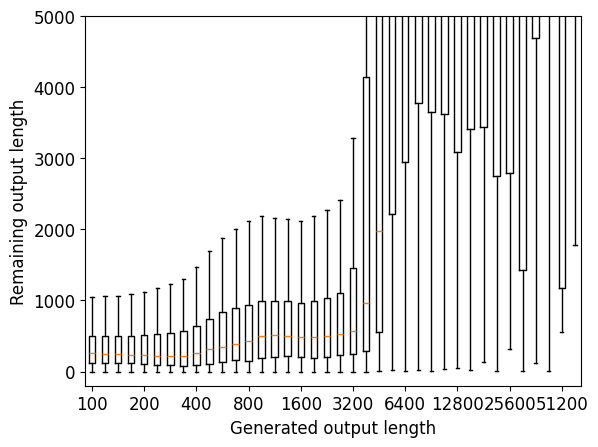

In [55]:
# cut = 5000
# sub_xticks = [x for x in xticks if x <= cut]
# sub_remain_len = remain_len[:len(sub_xticks)]
# plt.boxplot(sub_remain_len[1:], showfliers=False)
plt.boxplot(remain_len[1:], showfliers=False)
# plt.violinplot(remain_len[1:], showextrema=False)
# plt.xticks(ticks=list(range(1, len(sub_xticks)))[::4], labels=sub_xticks[1:][::4])
plt.xticks(ticks=list(range(1, len(xticks)))[::4], labels=xticks[1:][::4])
plt.ylim(-200, 5000)
plt.xlabel("Generated output length")
plt.ylabel("Remaining output length")
plt.savefig ("remaining_output_length2.png", dpi=400, bbox_inches = 'tight')
plt.show()

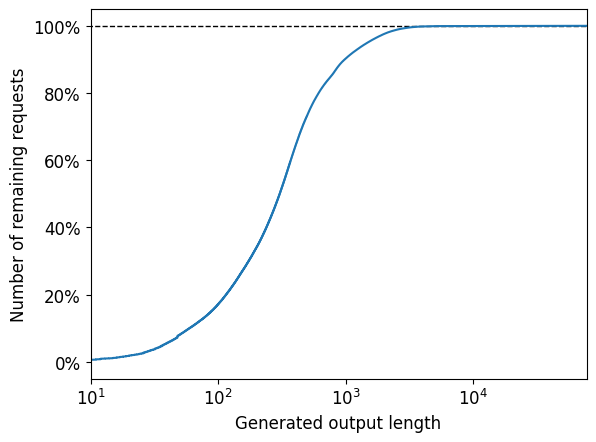

In [56]:
import copy
new_response_lens = copy.copy(response_lens)
new_response_lens.sort()

xmax = new_response_lens[-1]

plt.plot(new_response_lens, np.linspace(0, 1, len(new_response_lens)))

# plt.violinplot(printdata[1:], showextrema=False)
# plt.xlim(0, len(num_request_after_generate))
plt.plot([0, xmax], [1, 1], linewidth=1, color="black", linestyle="--", zorder=0.9)

# plt.xticks(list(range(1, len(xticks)))[::4], labels=xticks[1:][::4])
num_yticks = 6
yticks = np.linspace(0, 1, num_yticks)
plt.yticks(yticks, [f"{int(y*100+0.5)}%" for y in yticks])

plt.xscale("log", subs=[0])
plt.xlim(10, xmax)

plt.xlabel("Generated output length")
plt.ylabel("Number of remaining requests")
plt.savefig ("num_remaining_requests.png", dpi=400, bbox_inches = 'tight')
plt.show()

733551


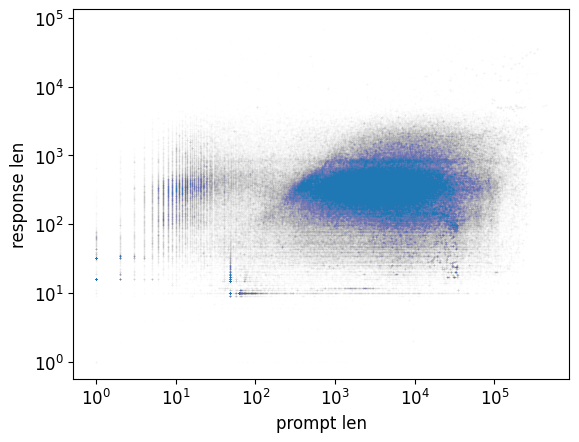

In [57]:
print(len(prompt_lens))
plt.xscale("log", subs=[0])
plt.yscale("log", subs=[0])
plt.xlabel("prompt len")
plt.ylabel("response len")
plt.scatter(prompt_lens, response_lens, s=1, alpha=0.002)
plt.savefig ("PD_scatter.png", dpi=400, bbox_inches = 'tight')
plt.show()

In [58]:
from scipy import stats

x = np.array(prompt_lens)
x[x==0] = 1

y = np.array(response_lens)
y[y==0] = 1

# x = np.log(x)  # 你的横坐标数据
# y = np.log(y)  # 你的纵坐标数据



# 皮尔逊相关系数（线性相关性）
pearson_r, pearson_p = stats.pearsonr(x, y)
print(f"皮尔逊相关系数: {pearson_r:.3f}, p值: {pearson_p:.3f}")

# 斯皮尔曼秩相关系数（单调相关性）
spearman_r, spearman_p = stats.spearmanr(x, y)
print(f"斯皮尔曼相关系数: {spearman_r:.3f}, p值: {spearman_p:.3f}")

# 肯德尔秩相关系数
kendall_tau, kendall_p = stats.kendalltau(x, y)
print(f"肯德尔相关系数: {kendall_tau:.3f}, p值: {kendall_p:.3f}")

皮尔逊相关系数: 0.152, p值: 0.000
斯皮尔曼相关系数: 0.126, p值: 0.000
肯德尔相关系数: 0.087, p值: 0.000
